<a href="https://colab.research.google.com/github/DrJHSIM/Portfolio_JHSIM/blob/main/Classification_PJT_%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_%E1%84%89%E1%85%A2%E1%86%BC%E1%84%8C%E1%85%A9%E1%86%AB%E1%84%8C%E1%85%A1_%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## `titanic` competitition

- 이번 프로젝트에서는 kaggle의 유명한 타이타닉 분류 문제를 풀어보겠습니다.

- sklearn으로 머신러닝 모델을 구현하겠습니다.


Source : https://www.kaggle.com/c/titanic

간단히 문제를 정리하자면 이번 Kaggle의 유명한 타이타닉 문제는 **머신러닝을 활용하여 승객들의 생존을 예측**하는 문제입니다. 생존에는 다양한 변수가 있을 수가 있습니다. 이름, 나이, 성별, 사회적 지위 등... 어떠한 연관성이 있는 승객들이 가장 많이 생존할 수 있는었는지에 대한 예측을 해보곘습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


머신러닝 라이브러리를 사용하기 위하여 **numpy, pandas, matplotlib, seaborn**을 중점으로 머신러닝을 분석해보겠습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# titanic data 불러오기
import pandas as pd

base_path = "/content/drive/MyDrive/Colab Notebooks/data/titanic/"

train = pd.read_csv(base_path + "train.csv")
test = pd.read_csv(base_path + "test.csv")
submission = pd.read_csv(base_path + "gender_submission.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##EDA

In [4]:
# titanic data에서 missing value를 찾아봅니다.
train[train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
#학습시킬 train data들의 정보를 확인합니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabom. Embarked에 결측치가 있는 것을 확인할 수 있습니다. 특히 Cabin에서는 많은 양의 결측치가 있습니다.Data Dictionary에서는 cabin의 정의는 cabin number(객실수)입니다. Cabin의 연관성을 고려하기 위하여 Cabin 열의 변수들을 확인해보도록 하겠습니다.

In [6]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Cabin 열에서 결측치가 없는 변수들입니다. 각 변수 간의 연관성은 없어보이고  객실의 번호로 추정합니다. 그러면 각 객실번호에 따른 수가 얼마나 있는지 확인해보도록 하겠습니다.

In [7]:
# 각 Cabin 종류별 개수
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

length가 147로 columns 변수가 총 147개로 구성되어 있는 것으로 알 수 있습니다.

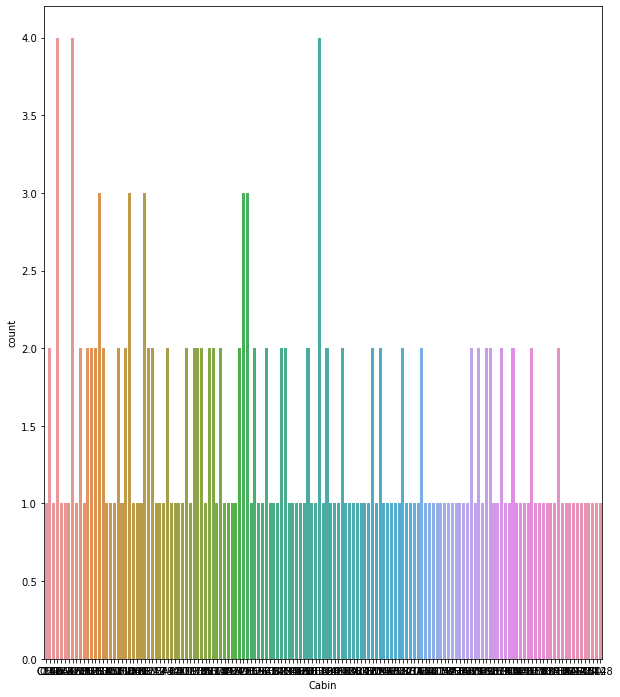

In [8]:
# 각 Cabin 종류에 따른 countplot
plt.figure(figsize = (10, 12))
sns.countplot(data = train, x = "Cabin")
plt.show()

count는 승객이 그 객실안에 있는 승객수입니다. count가 4라는 것은 그 객실에 승객이 4명이 있었다는 의미이고 나머지 결측치는 승객이 어느 객실에 있었는지를 모른다는 의미입니다. 따라서 학습할 때 결측치가 너무 많고 유의미한 결과를 도출하기에는 부족한 데이터라 판단이 되어 Cabin 행은 제거하도록 하겠습니다. 

### Data Preprocessing

1. 결측치 처리


2. feature selection (분석에 사용하지 않을 column 제거)

이번에는 Embared column에 관하여 결측치 처리에 관하여 고민해보도록 하겠습니다.

In [9]:
# 이번에는 Embarked column이 NaN인 row를 찾습니다.
train[train.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
train.Embarked.value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked에 대한 결측치는 채워서 처리하도록 하겠습니다. 첫 번째 방법은 과반수가 많은 S로 채운다. 2. 연관성을 찾아서 채운다.
저는 두개의 결측치가 있는 변수에서 Survived, Pclass, Sex, Fare, Ticket, Cabin의 공통점을 찾아보도록 하겠습니다. 특히 Cabin은 독립성이 강하기 때문에 Cabin에 타고 있는 승객이 있다면 그 사람은 일행일 확률이 큽니다.

In [11]:
NaN_Embarked = train.loc[train.Cabin == "B28", :]
NaN_Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
train.loc[(train.Pclass == 1) & (train.Sex == "female"), "Embarked"].value_counts()

S    48
C    43
Q     1
Name: Embarked, dtype: int64

In [13]:
train.loc[(train.Pclass == 1) & (train.Sex == "female") & (train.Survived == 1) , "Embarked"].value_counts()

S    46
C    42
Q     1
Name: Embarked, dtype: int64

In [14]:
train.loc[(train.Pclass == 1) & (train.Sex == "female") & (train.Survived == 1) & (train.Fare > 79.9) , "Embarked"].value_counts()

C    24
S    21
Q     1
Name: Embarked, dtype: int64

Pclass가 1이고 여성일 때와 추가로 생존했을 때의 수가 Embarked 일때는 S의 수가 많지만 요금이 79.9 보다 클 떄는 C가 많습니다. 그렇기 때문에 C로 처리하여 진행하도록 하겠습니다. 

In [15]:
train.loc[train.Embarked.isnull(), "Embarked"] = "C"

성별을 기준으로 생존률을 파악해보도록 하겠습니다.

In [16]:
pd.pivot_table(data=train, index=["Sex"], values=["Survived"], aggfunc=["sum", "mean", "count"])

,sum,mean,count
,Survived,Survived,Survived
Sex,,,
female,233,0.742038,314
male,109,0.188908,577


사회 계급을 기준으로 생존률을 파악해보도록 하겠습니다.

In [17]:
pd.pivot_table(data=train, index=["Pclass", "Sex"], values=["Survived"], aggfunc=["mean", "count"])

mean    count
               Survived Survived
Pclass Sex                      
1      female  0.968085       94
       male    0.368852      122
2      female  0.921053       76
       male    0.157407      108
3      female  0.500000      144
       male    0.135447      347

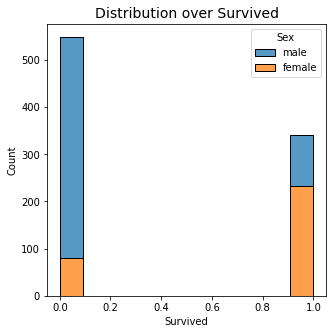

In [18]:
plt.figure(figsize = (5,5))
plt.title("Distribution over Survived", fontsize = 14)
sns.histplot(data = train, x = "Survived",  hue = "Sex", multiple = "stack")
plt.show()

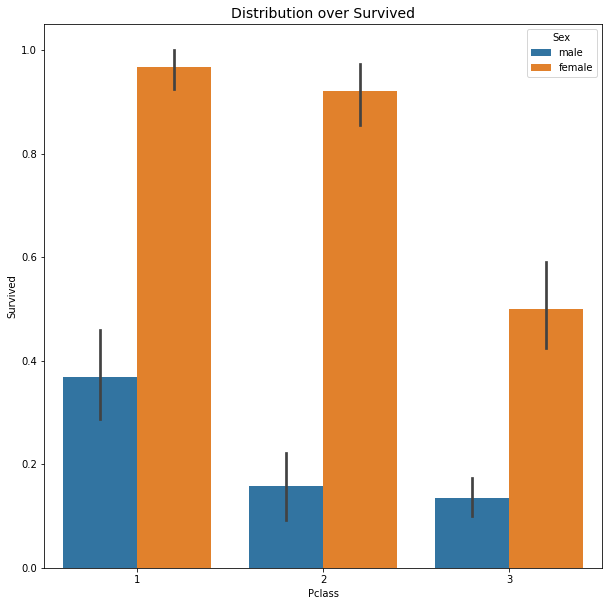

In [19]:
plt.figure(figsize = (10,10))
plt.title("Distribution over Survived", fontsize = 14)
sns.barplot(data = train, x = "Pclass", y = "Survived",  hue = "Sex")
plt.show()

<Figure size 720x720 with 0 Axes>

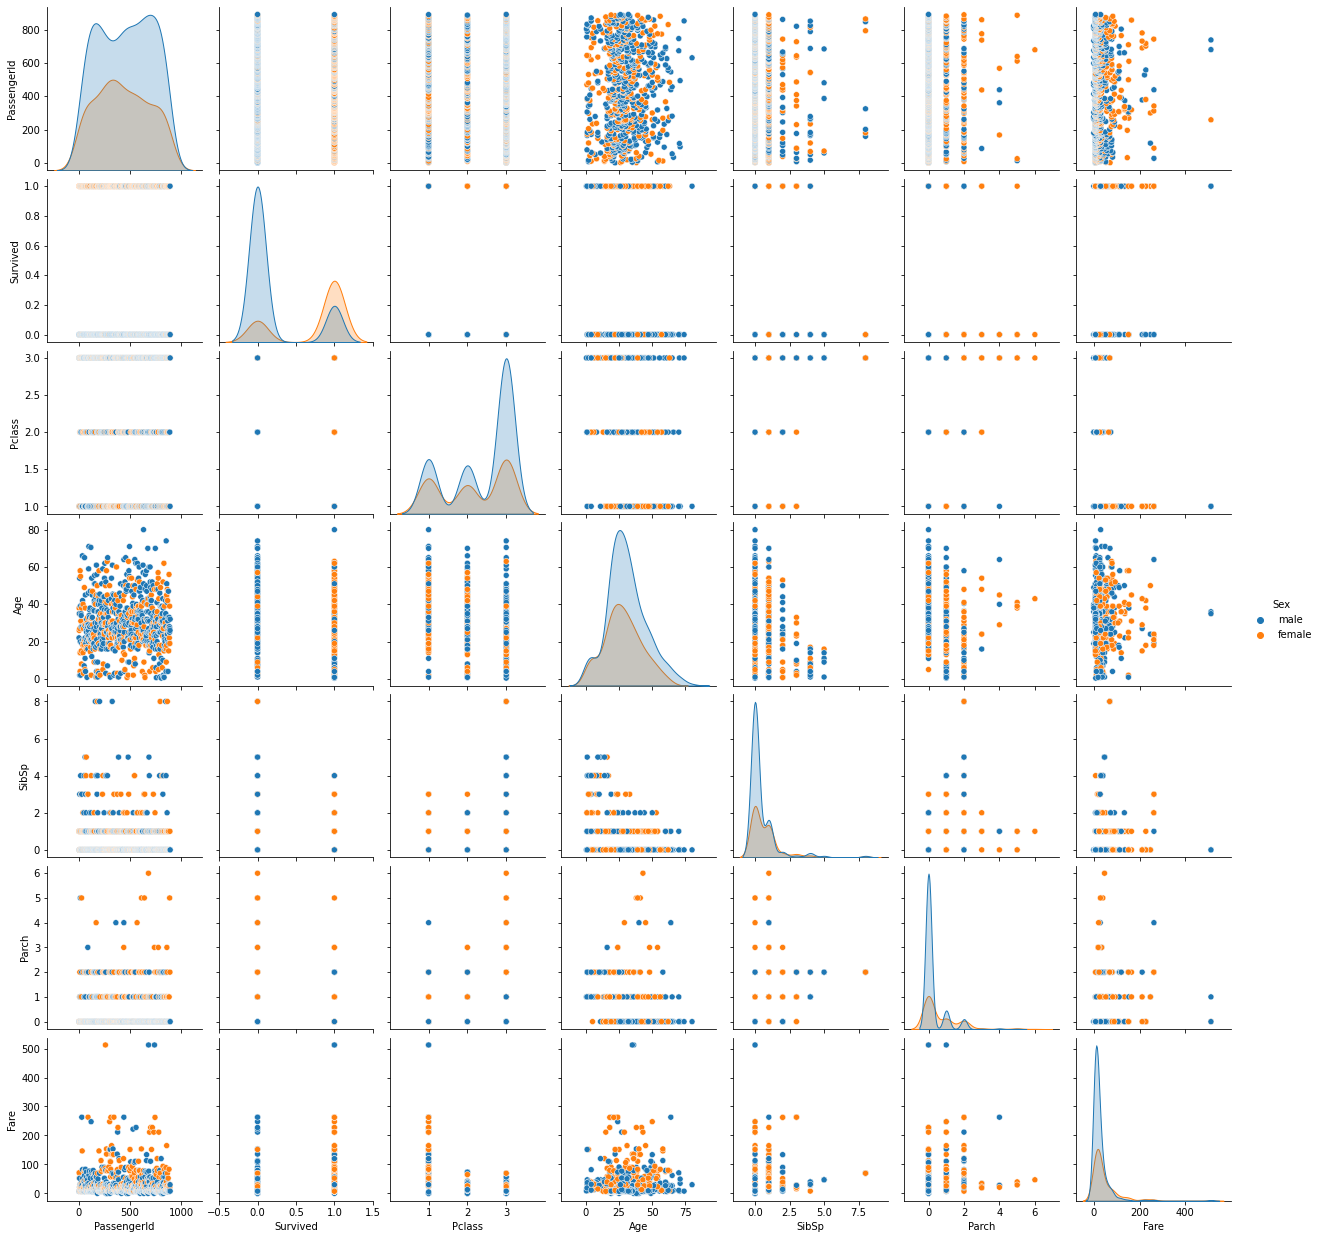

In [20]:
plt.figure(figsize = (10, 10))
sns.pairplot(data = train, hue = "Sex")
plt.show()

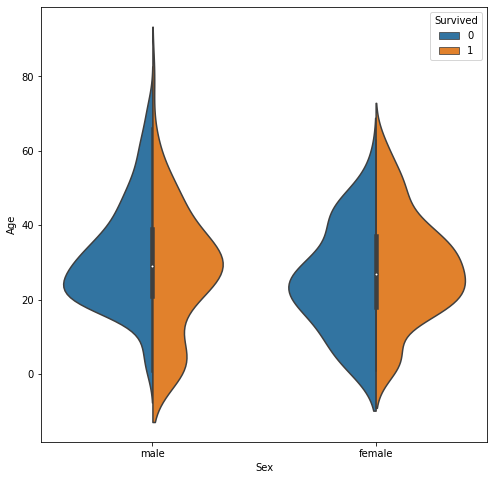

In [21]:
plt.figure(figsize= (8, 8))
sns.violinplot(data = train, x = "Sex", y = "Age", hue = "Survived", split = True)
plt.show()

#Name

In [22]:
train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

승객명들 간의 패턴을 추출하여 보겠습니다.

In [23]:
train["Title"] = train["Name"].str.extract('([A-Za-z]+)\.')

train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [24]:
def convert_title(title):
    if title in ["Ms", "Mile", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title == "Mr":
        return "Mr"
    elif title == "Master":
        return "Master"
    else:
        return "Other"
        
train["Title"] = train["Title"].map(convert_title)

train["Title"].value_counts()

Mr        517
Miss      183
Mrs       126
Master     40
Other      25
Name: Title, dtype: int64

Missing value와 모델을 구현할 때 필요없는 column을 제거하도록 하겠습니다.

In [25]:
train = train.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Age 결측치 처리하기

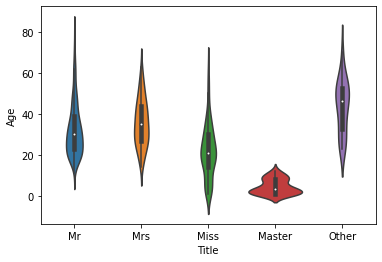

In [26]:
sns.violinplot(data=train, x="Title", y="Age")
plt.show()

이름으로 분류한 그룹과 나이의 분포를 보여줍니다.

In [27]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [28]:
train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.816327
Mr        32.368090
Mrs       35.788991
Other     43.750000
Name: Age, dtype: float64

승객의 그룹으로 분류한 나이의 평균을 확인하여 보았습니다. 이것은 Age의 결측치를 처리하는데 활용을 할 수 있습니다.

In [29]:
test["Title"] = test["Name"].str.extract('([A-Za-z]+)\.')
test["Title"] = test["Title"].map(convert_title)


In [30]:
data = [train, test]
for df in data:
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Master'), 'Age'] = 5
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Miss'), 'Age'] = 22
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mr'), 'Age'] = 32
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mrs'), 'Age'] = 36
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Other'), 'Age'] = 44

In [ ]:
# "Age" column 채우기
#train = train.fillna(train.Age.mean())
#train.info()

### Feature Engineering

1. Categorical feature encoding

2. Normalization

In [31]:
# categorical feature --> One-hot Encoding, Ordinal Encoding

# 1. Ordinal Encoding -> Ordinal feature를 변환할 때 쓰임. e.g. 학력, 선호도, ...
# 2. One-hot Encoding -> Nominal feautre를 변환할 때 쓰임. e.g. 성별, 부서, 출신학교, ...

train_OHE = pd.get_dummies(train, columns=["Sex", "Embarked", "Title"])
train_OHE

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1,0,1,0,0,0
888,0,3,22.0,1,2,23.4500,1,0,0,0,1,0,1,0,0,0
889,1,1,26.0,0,0,30.0000,0,1,1,0,0,0,0,1,0,0


In [32]:
# Normalization --> Min-Max scaling

X = train_OHE.drop(columns="Survived") # input matrix
y = train_OHE.Survived                 # target vector

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler.fit()
#scaler.transform()
#X.Age = scaler.fit_transform(X.Age)
#X.Fare = scaler.fit_transform(X.Fare)
#X
temp = scaler.fit_transform(X.loc[:, ["Age", "Fare"]])
X["Age"] = temp[:, 0]
X["Fare"] = temp[:, 1]
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,0.271174,1,0,0.014151,0,1,0,0,1,0,0,1,0,0
1,1,0.472229,1,0,0.139136,1,0,1,0,0,0,0,0,1,0
2,3,0.321438,0,0,0.015469,1,0,0,0,1,0,1,0,0,0
3,1,0.434531,1,0,0.103644,1,0,0,0,1,0,0,0,1,0
4,3,0.434531,0,0,0.015713,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0.334004,0,0,0.025374,0,1,0,0,1,0,0,0,0,1
887,1,0.233476,0,0,0.058556,1,0,0,0,1,0,1,0,0,0
888,3,0.271174,1,2,0.045771,1,0,0,0,1,0,1,0,0,0
889,1,0.321438,0,0,0.058556,0,1,1,0,0,0,0,1,0,0


### Training 

In [121]:
# sklearn에서 배웠던 분류 모델들을 불러와봅니다.
#from sklearn.linear_model import SGDClassifier      # 1. Linear Classifier
#from sklearn.linear_model import LogisticRegression # 2. Logistic Regression
#from sklearn.tree import DecisionTreeClassifier     # 3. Decision Tree
#from sklearn.ensemble import RandomForestClassifier # 4. Random Forest
#from sklearn.ensemble import 

# 평가 지표
#from sklearn.metrics import accuracy_score

In [33]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [34]:
classifiers = {
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier()
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X, y, cv=10,
        scoring=(['accuracy', 'f1'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
results

,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
4,SVM,0.835006,0.769403,0.802205
5,MLP,0.832784,0.768509,0.800647
1,LR,0.828290,0.767119,0.797704
6,XGB,0.831673,0.761406,0.796540
7,LGBM,0.821561,0.758420,0.789991
0,KNN,0.810400,0.738053,0.774226
3,RF,0.807016,0.740373,0.773695
2,DT,0.780050,0.716451,0.748251


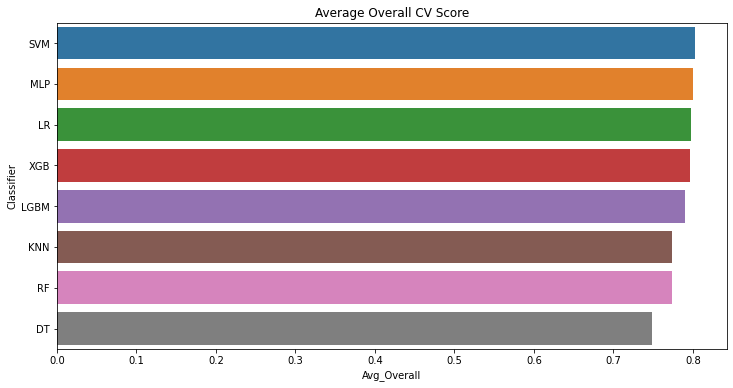

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="Avg_Overall", y="Classifier")
plt.title("Average Overall CV Score")
plt.show()

Best modeld은 SVM입니다. 이 알고리즘으로 test 데이터를 예측할 것입니다. 따라서, Grid Search Cross Validation을 사용하여 적절한 hyperparameters을 적용하겠습니다. 

In [ ]:
#lr = SVC()
#params =  {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
#clf = GridSearchCV(lr, params, cv=10)
#clf.fit(X, y)
#print("Best hyperparameter:", clf.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [36]:
lr = SVC()
params =  {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['sigmoid']}
clf = GridSearchCV(lr, params, cv=5)
clf.fit(X, y)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}


In [45]:
#lr = LogisticRegression()
#params = {
#    "penalty": ("l1", "l2", "elasticnet"),
#    "tol": (0.1, 0.01, 0.001, 0.0001),
#    "C": (10.0, 1.0, 0.1, 0.01)
#}
#clf = GridSearchCV(lr, params, cv=10)
#clf.fit(X, y)
#print("Best hyperparameter:", clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best hyperparameter: {'C': 1.0, 'penalty': 'l2', 'tol': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

#'rbf', 'poly', 

Train Accuracy: 0.8237934904601572
Train F1-Score: 0.7631975867269984


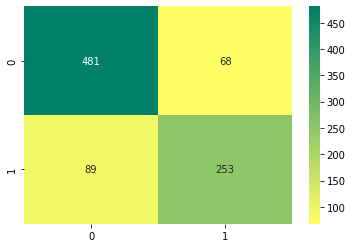

In [37]:
y_pred = clf.predict(X)
print(f"Train Accuracy: {accuracy_score(y, y_pred)}")
print(f"Train F1-Score: {f1_score(y, y_pred)}")
sns.heatmap(confusion_matrix(y, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()

Train Accuracy: 0.8305274971941639
Train F1-Score: 0.7736131934032983


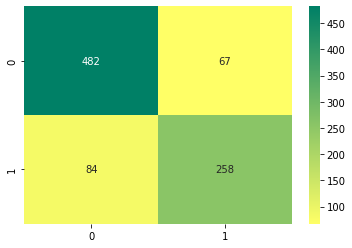

In [47]:
#y_pred = clf.predict(X)
#print(f"Train Accuracy: {accuracy_score(y, y_pred)}")
#print(f"Train F1-Score: {f1_score(y, y_pred)}")
#sns.heatmap(confusion_matrix(y, y_pred), fmt='.3g', annot=True, cmap='summer_r')
#plt.show()

In [48]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       549
           1       0.79      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



In [122]:
#clf = SGDClassifier()
#clf2 = LogisticRegression()
#clf3 = DecisionTreeClassifier()
#clf4 = RandomForestClassifier()

#clf.fit(X, y)
#clf2.fit(X, y)
#clf3.fit(X, y)
#clf4.fit(X, y)

#pred = clf.predict(X)
#pred2 = clf2.predict(X)
#pred3 = clf3.predict(X)
#pred4 = clf4.predict(X)

In [123]:
#print("1. Linear Classifier, Accuracy for training : %.4f" % accuracy_score(y, pred))
#print("2. Logistic Regression, Accuracy for training : %.4f" % accuracy_score(y, pred2))
#print("3. Decision Tree, Accuracy for training : %.4f" % accuracy_score(y, pred3))
#print("4. Random Forest, Accuracy for training : %.4f" % accuracy_score(y, pred4))

1. Linear Classifier, Accuracy for training : 0.8294
2. Logistic Regression, Accuracy for training : 0.8305
3. Decision Tree, Accuracy for training : 0.9832
4. Random Forest, Accuracy for training : 0.9832


### Test (Predict)

In [49]:
# test data에 같은 feature engineering을 적용해줍니다.

# Imputation
test = test.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

#test = test.fillna(train.Age.mean()) # (***)
test = test.fillna(train.Fare.mean()) # (***)

# Categorical feature encoding
test_OHE = pd.get_dummies(data=test, columns=["Sex", "Embarked", "Title"])

# Normalization
temp = scaler.transform(test_OHE.loc[:, ["Age", "Fare"]])
test_OHE.Age = temp[:, 0]
test_OHE.Fare = temp[:, 1]

test_OHE

KeyError: ignored

In [128]:
# prediction
#result = clf.predict(test_OHE)
#result2 = clf2.predict(test_OHE)
#result3 = clf3.predict(test_OHE)
#result4 = clf4.predict(test_OHE)

In [50]:
#prediction
final_result = clf.predict(test_OHE)

In [51]:
# 결과 파일인 submission.csv를 생성합니다.
submission["Survived"] = final_result
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


- 모든 학습이 끝나면 결과를 가지고 제출해볼 수 있습니다.

- 만든 모델 중에 가장 test 성능이 좋은 하나를 제출해볼까요?

[제출하러가기] https://www.kaggle.com/c/titanic

In [52]:
submission.to_csv("submission11.csv", index=False)